<a href="https://colab.research.google.com/github/Deepakk200/Machine-Learning-and-AI-with-Python/blob/main/decision%20trees%20dt_classifier_scaffold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import cross_val_score

def plot_boundary(elect_train, dt1, dt2 ):
    y_train = elect_train['won']
    x1_min, x1_max = elect_train['minority'].min() - 1, elect_train['minority'].max() + 1
    x2_min, x2_max = elect_train['bachelor'].min() - 1, elect_train['bachelor'].max() + 1
    x1x, x2x = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    yhat2 = dt1.predict(np.c_[x1x.ravel(), x2x.ravel()]).reshape(x1x.shape)
    yhat10 = dt2.predict(np.c_[x1x.ravel(), x2x.ravel()]).reshape(x1x.shape)


    fig, (ax1,ax2) = plt.subplots(1,2, figsize=[15,6])

    ax1.contourf(x1x, x2x, yhat2, alpha=0.2,cmap="PiYG");
    ax1.scatter(elect_train['minority'][y_train==1], elect_train['bachelor'][y_train==1],marker=".",color="green",label="Trump")
    ax1.scatter(elect_train['minority'][y_train==0], elect_train['bachelor'][y_train==0],marker=".",color="purple",label="Clinton")

    ax1.set_xlabel("minority")
    ax1.set_ylabel("bachelor")
    ax1.set_title("Decision Tree with max_depth=2")
    ax1.legend()

    ax2.contourf(x1x, x2x, yhat10, alpha=0.2,cmap="PiYG");
    ax2.scatter(elect_train['minority'][y_train==1], elect_train['bachelor'][y_train==1],marker=".",color="green",label="Trump")
    ax2.scatter(elect_train['minority'][y_train==0], elect_train['bachelor'][y_train==0],marker=".",color="purple",label="Clinton")

    ax2.set_xlabel("minority")
    ax2.set_ylabel("bachelor")
    ax2.set_title("Decision Tree with max_depth=10")
    ax2.legend()
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
# from helper import plot_boundary
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#This line sets the display width for pandas DataFrames to 100 characters.
pd.set_option('display.width', 100)
#This line sets the maximum number of columns to display when printing a DataFrame to 20 columns
pd.set_option('display.max_columns', 20)
#This line sets the default size of the figures created using matplotlib to be 12 inches wide and 8 inches tall
plt.rcParams["figure.figsize"] = (12,8)


In [ ]:
elect_train = pd.read_csv("/content/drive/MyDrive/datasets/election_train.csv")
elect_test = pd.read_csv("/content/drive/MyDrive/datasets/election_train.csv")
elect_train.head()


,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,trump,clinton,votergap,won
0,Alabama,1001,Autauga County,50756,2.842,22.733,51.475,5.2,54366,13.8,21.9,28.6,34.1,91.8,186.5,73.436,23.957,49.479,1
1,Alabama,1003,Baldwin County,179878,4.550,12.934,51.261,5.5,49626,11.0,28.6,22.3,27.4,114.6,229.4,77.351,19.565,57.786,1
2,Alabama,1007,Bibb County,21587,2.409,23.930,46.110,6.6,39546,22.1,10.2,33.9,40.3,36.8,230.3,76.966,21.422,55.544,1
3,Alabama,1009,Blount County,58345,8.954,4.229,50.592,5.4,45567,21.9,12.3,28.0,34.6,88.9,205.3,89.852,8.470,81.382,1
4,Alabama,1011,Bullock County,10985,7.526,72.831,45.241,7.8,26580,34.5,14.1,31.7,43.0,17.5,211.2,24.229,75.090,-50.862,0


In [ ]:
# Set the columns minority and bachelor as train data predictors
X_train = elect_train[['minority' , 'bachelor']]

# Set the columns minority and bachelor as test data predictors
X_test = elect_test[['minority' , 'bachelor']]

# Set the column "won" as the train response variable
y_train = elect_train["won"]

# Set the column "won" as the test response variable
y_test = elect_test["won"]


In [ ]:
dt1 = DecisionTreeClassifier(max_depth = 2)
dt1.fit(X_train , y_train)
dt2 = DecisionTreeClassifier(max_depth = 10)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


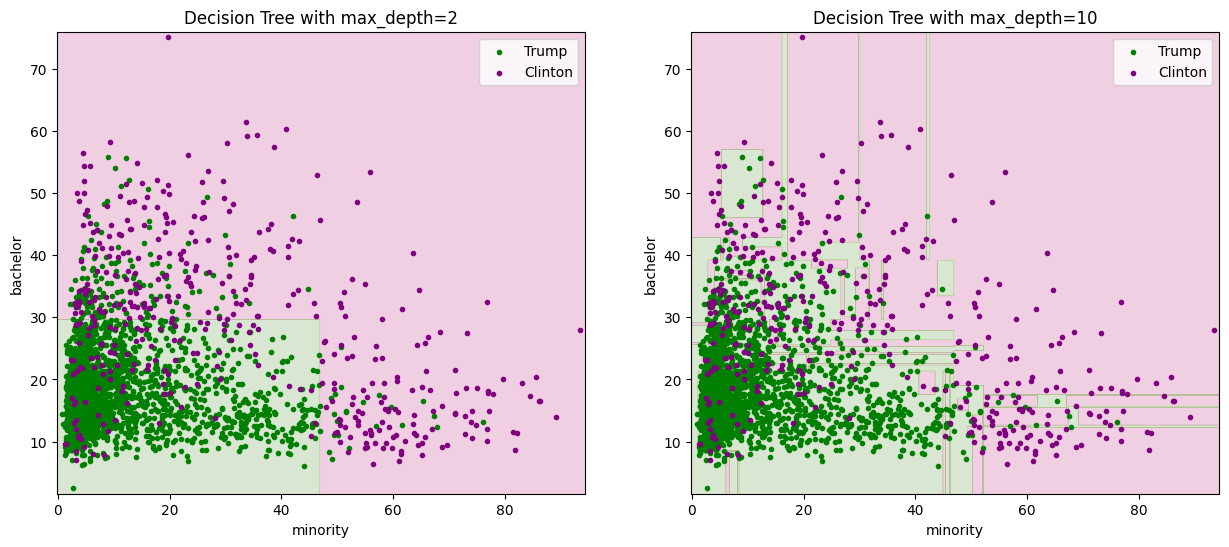

In [ ]:
# Call the function plot_boundary
# the decision boundaries of both the classifiers
plot_boundary(elect_train, dt1, dt2)


In [ ]:
# Set of predictor columns
pred_cols = ['minority', 'density','hispanic','obesity','female','income','bachelor','inactivity']

# Use the columns above as the features to
# get the predictor set from the train data
X_train = elect_train[pred_cols]

# get the predictor set from the test data
X_test = elect_test[pred_cols]
dt1 =DecisionTreeClassifier(max_depth = 2)

dt2 =DecisionTreeClassifier(max_depth = 10)

dt3 = DecisionTreeClassifier(max_depth = 15)

dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt3.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=15)

In [ ]:
# Compute the train and test accuracy for the first decision tree classifier of depth 2
dt1_train_acc = dt1.score(X_train, y_train)
dt1_test_acc = dt1.score(X_test, y_test)

# Compute the train and test accuracy for the second decision tree classifier of depth 10
dt2_train_acc = dt2.score(X_train, y_train)
dt2_test_acc = dt2.score(X_test, y_test)

# Compute the train and test accuracy for the third decision tree classifier of depth 15
dt3_train_acc = dt3.score(X_train, y_train)
dt3_test_acc = dt3.score(X_test, y_test)

In [ ]:
# Helper code to plot the scores of each classifier as a table
pt = PrettyTable()
pt.field_names = ['Max Depth', 'Number of Features', 'Train Accuracy', 'Test Accuracy']
pt.add_row([2, len(pred_cols), round(dt1_train_acc, 4), round(dt1_test_acc,4)])
pt.add_row([10, len(pred_cols), round(dt2_train_acc,4), round(dt2_test_acc,4)])
pt.add_row([15, len(pred_cols), round(dt3_train_acc,4), round(dt3_test_acc,4)])
print(pt)


+-----------+--------------------+----------------+---------------+
| Max Depth | Number of Features | Train Accuracy | Test Accuracy |
+-----------+--------------------+----------------+---------------+
|     2     |         8          |     0.8924     |     0.8924    |
|     10    |         8          |     0.9863     |     0.9863    |
|     15    |         8          |     0.9996     |     0.9996    |
+-----------+--------------------+----------------+---------------+
